In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pickle
import obspy
from scipy.signal import find_peaks
import os
import pandas as pd

In [23]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [24]:
#scardec_name = os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec')[0]

In [25]:
number_of_peaks_opt = []
magnitudes_opt = []
number_of_peaks_moy = []
magnitudes_moy = []
names_of_peaks = []

time_of_peak_moy = []
height_of_peak_moy = []
proportional_time_of_peak_moy = []
time_of_peak_opt = []
height_of_peak_opt = []
proportional_time_of_peak_opt = []


for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):
    names_of_peaks.append(scardec_name)
    db = combined[combined['scardec_name']==scardec_name]
    magnitudes_opt.append(db['scardec_magnitude'].values[0])
    magnitudes_moy.append(db['scardec_magnitude'].values[0])

    time_opt = []
    momentrate_opt = []

    time_moy = []
    momentrate_moy = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith('fctopt')]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        time_opt.append(float(split[0]))
        momentrate_opt.append(float(split[1]))

    peaks_opt = find_peaks(momentrate_opt,
                    height = (None, None),
                    threshold = (None, None),
                    prominence = (None, None),
                    width = (None, None))

    starts = [n for n, l in enumerate(event) if l.startswith('fctmoy')]

    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    #print(lines)
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        #print(split)
        time_moy.append(float(split[0]))
        momentrate_moy.append(float(split[1]))

    peaks_moy = find_peaks(momentrate_moy,
                    height = (None, None),
                    threshold = (None, None),
                    prominence = (None, None),
                    width = (None, None))


    max_peak_index = np.argmax(peaks_moy[1]['peak_heights'])

    time_of_peak_moy.append(time_moy[peaks_moy[0][max_peak_index]])
    height_of_peak_moy.append(peaks_moy[1]['peak_heights'][max_peak_index])
    proportional_time_of_peak_moy.append(time_moy[peaks_moy[0][max_peak_index]]/np.max(time_moy))

    max_peak_index = np.argmax(peaks_opt[1]['peak_heights'])

    time_of_peak_opt.append(time_opt[peaks_opt[0][max_peak_index]])
    height_of_peak_opt.append(peaks_opt[1]['peak_heights'][max_peak_index])
    proportional_time_of_peak_opt.append(time_opt[peaks_opt[0][max_peak_index]]/np.max(time_opt))



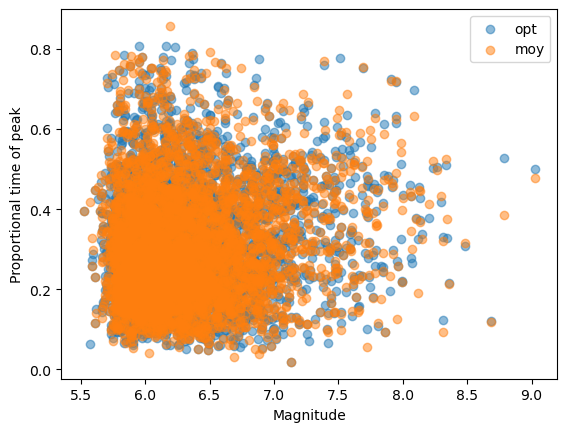

In [26]:
plt.scatter(magnitudes_opt, proportional_time_of_peak_opt, label='opt', alpha = 0.5)
plt.scatter(magnitudes_moy, proportional_time_of_peak_moy, label='moy', alpha = 0.5)
plt.ylabel('Proportional time of peak')
plt.xlabel('Magnitude')
plt.legend()
plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/peak_investigations/proportional_time_of_largest_peak_vs_magnitude.png')

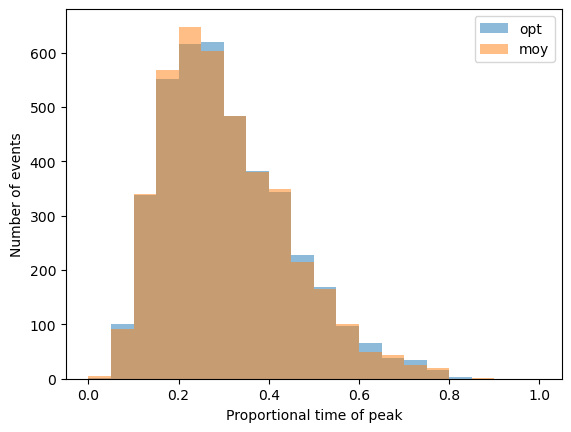

In [27]:
plt.hist(proportional_time_of_peak_opt, bins = np.arange(0, 1.01, 0.05), alpha = 0.5, label='opt')
plt.hist(proportional_time_of_peak_moy, bins = np.arange(0, 1.01, 0.05), alpha = 0.5, label='moy')
plt.xlabel('Proportional time of peak')
plt.ylabel('Number of events')
plt.legend()
plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/peak_investigations/proportional_time_of_largest_peak_histogram.png')